<a href="https://colab.research.google.com/github/yourEmotion/OutflowPredictions/blob/main/predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этом файле выполнено домашнее задание к курсу ***Deep Learning*** (продвинутый поток).
**Тема:** предсказание оттока пользователей.

Установим необходимые модули для обработки и визуализации данных.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Считаем данные из csv-файла.

In [3]:
dataset = pd.read_csv('train.csv')
dataset.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [4]:
dataset.tail()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
5281,19,75.90,1375.6,Female,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0


Убедимся, что в данных нет пропусков.

In [5]:
dataset.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Как видим, в столбце **TotalSpent** вещественные числа представлены типом *object*, а не *float*. Кроме того, на самом деле в этом столбце есть пропуски.

In [7]:
(dataset['TotalSpent'] == ' ').sum()

9

Переведем эти значения в *float*.

In [8]:
total_spent_idx = tuple(dataset.columns).index('TotalSpent')
dataset = pd.concat((dataset.iloc[:, :total_spent_idx],
                     dataset['TotalSpent'].replace(' ', '0').apply(float),
                     dataset.iloc[:, total_spent_idx + 1:]),
                     axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Обработаем категориальные признаки.

In [9]:
numeric_indeces = np.array([0, 1, 2, 4, 19])
categorical_indeces = np.array([3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

numeric_dataset = dataset[dataset.columns[numeric_indeces]]
categorical_dataset = dataset[dataset.columns[categorical_indeces]]

Применим **One-Hot encoding** для категориальных признаков.

In [10]:
dummy_features = pd.get_dummies(categorical_dataset)
dummy_features

,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
1,0,1,0,1,1,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
3,1,0,0,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,1,0,0,1,0,1,0,1,0,0,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
5278,0,1,0,1,1,0,1,0,0,1,...,0,0,1,0,0,1,1,0,0,0
5279,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
5280,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [11]:
dataset_modern = pd.concat((dummy_features, numeric_dataset), axis=1)
X = dataset_modern.iloc[:, :-1]
X.head()

,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,...,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen
0,0,1,0,1,0,1,0,1,1,0,...,1,0,0,0,0,1,55,19.50,1026.35,0
1,0,1,0,1,1,0,0,1,0,0,...,1,0,0,1,0,0,72,25.85,1872.20,0
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,1,0,1,75.90,75.90,0
3,1,0,0,1,1,0,0,1,0,0,...,1,0,0,0,0,1,32,79.30,2570.00,1
4,1,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,60,115.25,6758.45,0


In [12]:
y = dataset_modern['Churn']
y

0       0
1       0
2       1
3       0
4       0
       ..
5277    0
5278    0
5279    0
5280    0
5281    0
Name: Churn, Length: 5282, dtype: int64

Предобработка данных совершена. Теперь можно обучать модель.


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size = 0.8, random_state=35)

Напишем функцию для поиска наилучших значений гиперпараметров.

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
def search(X, y, model, param_name, grid, param_scale, draw=True):
  parameters = {param_name: grid}

  CV_model = GridSearchCV(estimator=model,
                          param_grid=parameters,
                          cv=5,
                          scoring='accuracy',
                          n_jobs=-1,
                          verbose=10)

  CV_model.fit(X, y)

  means = CV_model.cv_results_['mean_test_score']
  error = CV_model.cv_results_['std_test_score']

  print(f'model: {model.__class__.__name__}\nbest_params: {CV_model.best_params_}\nbest_score: {CV_model.best_score_}')

  if draw:
    if param_scale == 'log':
      plt.xscale('log')

    plt.title(model.__class__.__name__)

    plt.xlabel(param_name)
    plt.ylabel('mean test score')
    plt.plot(grid, means, color='red')
    plt.fill_between(grid, means - 2*error, means + 2*error, color='green')

    plt.show()


Для начала в качестве моделей рассмотрим **KNN**, **Дерево решений** и **Случайный лес**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]
param_names = ['n_neighbors', 'max_depth', 'max_depth']
grids = [np.arange(1, 50), np.arange(1, 30), np.arange(1, 30)]
param_scales = ['ordinary', 'ordinary', 'ordinary']

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
model: KNeighborsClassifier
best_params: {'n_neighbors': 24}
best_score: 0.7905325443786982


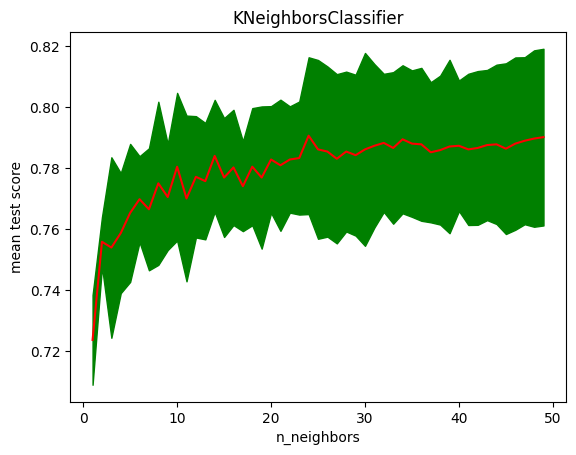

Fitting 5 folds for each of 29 candidates, totalling 145 fits
model: DecisionTreeClassifier
best_params: {'max_depth': 4}
best_score: 0.794792899408284


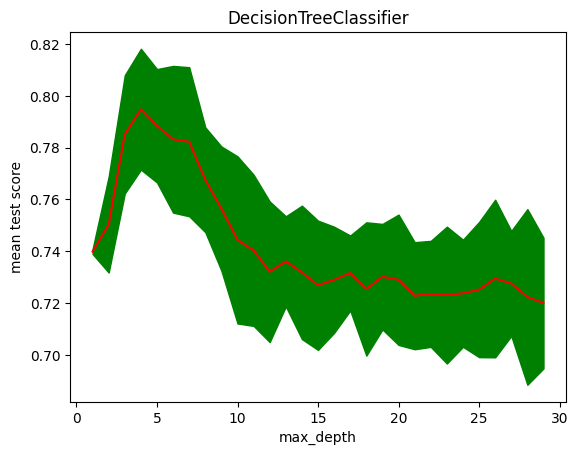

Fitting 5 folds for each of 29 candidates, totalling 145 fits
model: RandomForestClassifier
best_params: {'max_depth': 8}
best_score: 0.8035502958579881


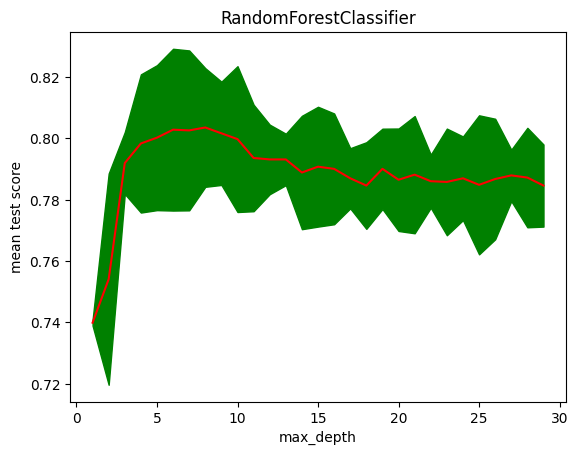

In [18]:
for model, param_name, grid, param_scale in zip(models, param_names, grids, param_scales):
  search(X_train_scaled, y_train, model, param_name, grid, param_scale)

Как видим, почему-то случайный лес справляется не лучше обычного решающего дерева или KNN.

In [29]:
model = RandomForestClassifier(max_depth=8)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print('Совпало: {}'.format(sum(y_pred == y_test)), 'Не совпало: {}'.format(sum(y_pred != y_test)), sep='\n')

Совпало: 825
Не совпало: 232
